Questions:
- Does 40dB SNR mean that the variance of the noise should be 1/10000
- Probably okay to truncate the beginning and ending parts where we don't pad data? 
- Setting the delay of the desired signal: doesn't this just shift where the cursor gets placed in our weights?

In [1]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define channels
h1 = np.array([0.2194, 1.0, 0.2194])
h2 = np.array([0.2798, 1.0, 0.2798])
h3 = np.array([0.3365, 1.0, 0.3365])
h_num_pre = 1
h_num_post = 1

# Generate gaussian distribution noise v
def generate_random_variable(mean,std,n):
    output = []
    for i in range(0,n):
        output.append(random.gauss(mean,std))
    return np.array(output)

# Generate input sequence a
def generate_random_input(n):
    return np.array(random.choices([-1,1],k=n))

# Generate channel output
def channel_output(a,h):
    return np.convolve(a,h)

# Full communication setup
def run_experiment(N_samples,M_weights,h,mu):
    w = np.array([0.0 for i in range(0,M_weights)]) # initialize weights to zero
    # Generate channel output, u
    tx_data = generate_random_input(n=N_samples)
    x = channel_output(tx_data,h)
    # noise = generate_random_variable(mean=0,std=1,n=len(x))
    noise = generate_random_variable(mean=0,std=1/100,n=len(x)) # 40 dB means 10000 times less noise power than signal power, so std of 100 times less
    ch_out = x + noise
    e = np.array([])
    for i in range(0,len(ch_out)-len(w)+1):
        # Determine filter input vector u
        u = np.flip(ch_out[i:i+len(w)])
        # Apply adaptive filter
        y = np.dot(w,u)
        # Update weights using LMS
        desired = tx_data[i]
        error = desired - y
        e = np.append(e,error)
        w = w + mu * error * u
    return w, e

# Estimate, via averaging, the MSE
def estimate_mse(e_k,K,N):
    mse = np.array([0.0 for n in range(0,N)])
    for n in range(0,N):
        for k in range(0,K):
            mse[n] = mse[n] + e_k[k][n] * e_k[k][n]
    return mse / K



Text(0.5, 1.0, 'Effect of Eigenvalue Spread of the Channel')

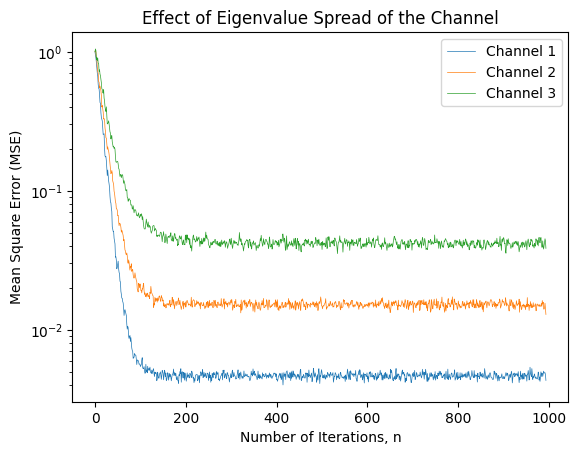

In [88]:
# Q1
N = 1000
K = 500
M = 9
mu = 0.075
for ch_num,h in enumerate([h1,h2,h3]):
    e = []
    for k in range(0,K):
        w_k,e_k = run_experiment(N,M,h,mu)
        e.append(e_k)
        # print(w_k)
        # print(len(e_k))
    mse = estimate_mse(e,K,len(e[0]))
    plt.semilogy(mse,label="Channel " + str(ch_num + 1),linewidth=0.5)
plt.ylabel("Mean Square Error (MSE)")
plt.xlabel("Number of Iterations, n")
plt.legend()
plt.title("Effect of Eigenvalue Spread of the Channel")

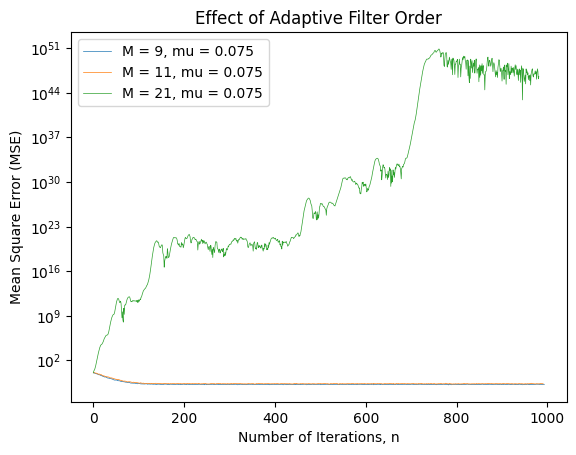

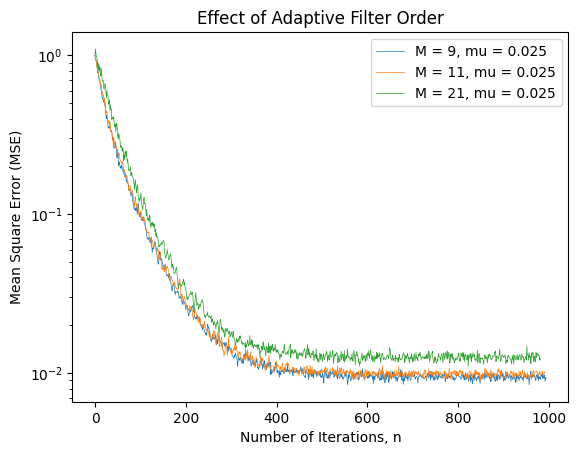

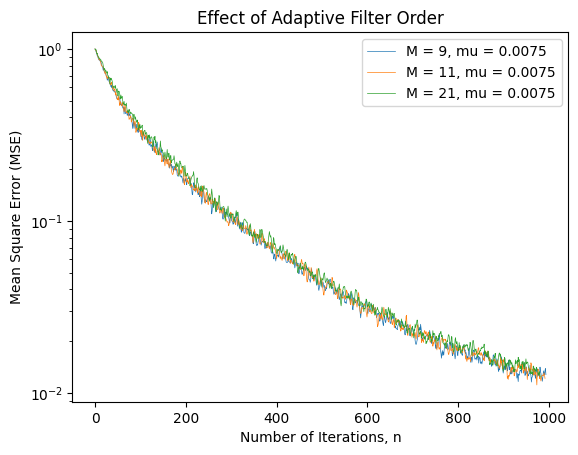

In [89]:
# Q2
N = 1000
K = 500
M = [9,11,21]
mu = [0.075,0.025,0.0075]
for i in range(0,3):
    for j in range(0,3):
        e = []
        for k in range(0,K):
            w_k,e_k = run_experiment(N,M[j],h2,mu[i])
            e.append(e_k)
        mse = estimate_mse(e,K,len(e[0]))
        plt.semilogy(mse,label="M = " + str(M[j]) + ", mu = " + str(mu[i]),linewidth=0.5)
    plt.ylabel("Mean Square Error (MSE)")
    plt.xlabel("Number of Iterations, n")
    plt.legend()
    plt.title("Effect of Adaptive Filter Order")
    plt.show()

Text(0.5, 1.0, 'Effect of Eigenvalue Spread of the Channel')

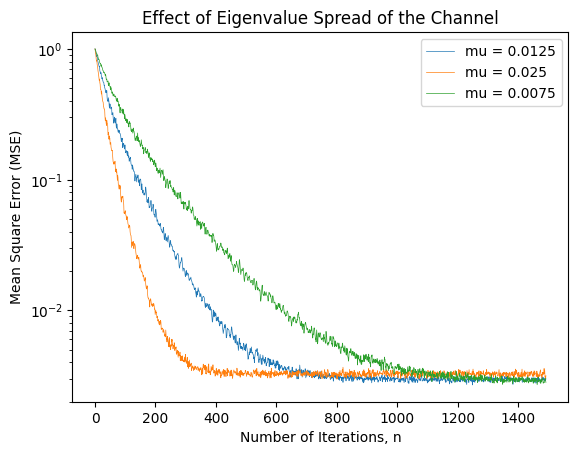

In [90]:
# Q3
N = 1500
K = 500
M = 11
mu = [0.0125,0.025,0.0075]
for i in range(0,3):
    e = []
    for k in range(0,K):
        w_k,e_k = run_experiment(N,M,h1,mu[i])
        e.append(e_k)
    mse = estimate_mse(e,K,len(e[0]))
    plt.semilogy(mse,label="mu = " + str(mu[i]),linewidth=0.5)
plt.ylabel("Mean Square Error (MSE)")
plt.xlabel("Number of Iterations, n")
plt.legend()
plt.title("Effect of Eigenvalue Spread of the Channel")